<img src='https://github.com/LinkedEarth/Logos/raw/master/PYLEOCLIM_logo_HORZ-01.png' width="800">

# Principal Component Analysis with Pyleoclim

by [Julien Emile-Geay](https://orcid.org/0000-0001-5920-4751), [Deborah Khider](https://orcid.org/0000-0001-7501-8430)

## Preamble
Multivariate data reduction

### Goals

- PCA
- MC-PCA

**Reading Time: 15 min**

### Keywords
Principal Component Analysis, Singular Value Decomposition, Data Reduction

### Pre-requisites
None

### Relevant Packages
statsmodels, matplotlib, pylipd

## Data 
### Data Description

Euro2k ayayayayyyaya, PAGES 2k

### Loading
To load this dataset, we make use of [pylipd](https://pylipd.readthedocs.io). We first import everything into a pandas dataframe:

In [5]:
from pylipd.utils.dataset import load_dir
import numpy as np
lipd = load_dir(name='Euro2k')
df = lipd.get_timeseries_essentials()
# clean up strings now while waiting for bug fix in pylipd
df['paleoData_values']=df['paleoData_values'].apply(lambda row : np.fromstring(row.strip("[]"), sep=','))
df['time_values']=df['time_values'].apply(lambda row : np.fromstring(row.strip("[]"), sep=','))

Loading 31 LiPD files


100%|██████████| 31/31 [00:00<00:00, 53.78it/s]


Loaded..


/var/folders/bf/_x19bm694857h_hrw44j0p7w0000gn/T/ipykernel_65585/496163694.py:6: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  df['paleoData_values']=df['paleoData_values'].apply(lambda row : np.fromstring(row.strip("[]"), sep=','))


Next, we select all the variable names associated with temperature-dependent observations: 

In [6]:
dfs = df.query("paleoData_variableName in ('temperature','MXD','density','d18O','trsgi','density')") 

Next, we iterate over the rows of this dataframe, create GeoSeries objects for each proxy record, and bundle them all into a MultipleGeoSeries object:


In [14]:
import pyleoclim as pyleo
ts_list = []
for _, row in dfs.iterrows():
    ts_list.append(pyleo.GeoSeries(time=row['time_values'],value=row['paleoData_values'],
                                   time_name='Time',value_name=row['paleoData_variableName'],
                                   time_unit=row['time_units'], value_unit=row['paleoData_units'],
                                   lat = row['geo_meanLat'], lon = row['geo_meanLon'],
                                   archiveType = row['archiveType'], verbose = False, 
                                   label=row['dataSetName']+'_'+row['paleoData_variableName'])) 

Euro2k = pyleo.MultipleGeoSeries(ts_list, label='Euro2k', time_unit='year AD')  

/Users/julieneg/Documents/GitHub/Pyleoclim_util/pyleoclim/core/series.py:236: UserWarning: archiveType should be one of the following: ice-other, ice/rock, coral, documents, glacierice, hybrid, lakesediment, marinesediment, sclerosponge, speleothem, wood, molluskshells, peat, midden, instrumental, model, 
  warnings.warn('archiveType should be one of the following: ' + mystring)
/Users/julieneg/Documents/GitHub/Pyleoclim_util/pyleoclim/core/multipleseries.py:84: UserWarning: Time unit "BP" unknown; triggering defaults
  new_ts = ts.convert_time_unit(time_unit=self.time_unit)


### Mapping
Let's map these records all at once:

(<Figure size 640x480 with 1 Axes>, <GeoAxes: >)

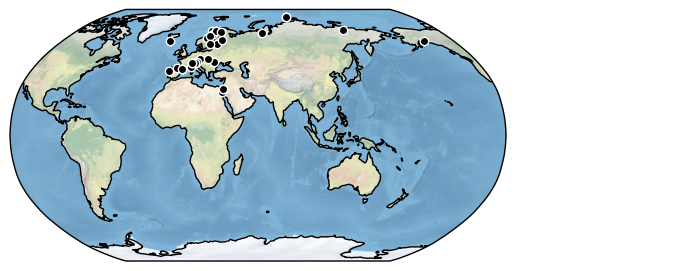

In [8]:
Euro2k.map()

BUG: No legend.  

The default projection is "Robinson" because it is a visually pleasing balance between distorting areas or length (no 2D projection of a 3D object can preserve both). However, there would be more suitable choices for this latitude range. For instance:

(<Figure size 640x480 with 1 Axes>, <GeoAxes: >)

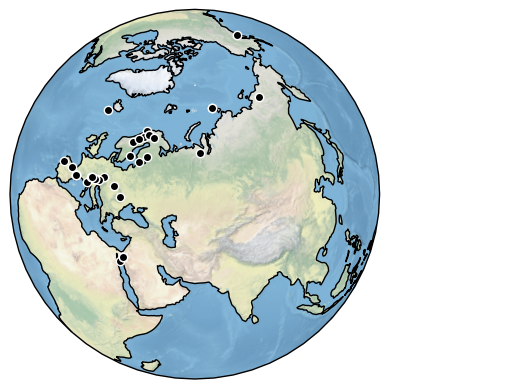

In [9]:
Euro2k.map(projection='Orthographic')

For a full list of allowable projections, see the [cartopy documentation](https://scitools.org.uk/cartopy/docs/latest/reference/projections.html).

## Principal Component Analysis

In [15]:
Euro2kc = Euro2k.common_time()

ValueError: At least one series has no common time interval with others. Please check the time axis of the series.

In [18]:
time_span = []
for i, ts in enumerate(Euro2k.series_list):
    time_span.append([ts.time.min(), ts.time.max()])

In [19]:
time_span

[[1751.0829999883865, 1995.5829999951127],
 [1099.9999999983775, 2006.9999999998054],
 [1499.9999999718605, 1999.9999999941692],
 [1499.9999999718605, 2006.9999999998054],
 [-499.9999999906201, 2002.9999999965846],
 [-43.99999997204899, 1371.9999999955564],
 [577.9999999900441, 1993.9999999893384],
 [1549.999999980429, 2009.999999970532],
 [1258.999999999641, 1993.9999999893384],
 [-89.99999997739704, 1934.9999999735235],
 [1885.9999999974486, 1991.999999987728],
 [782.9999999966557, 2010.999999971337],
 [797.9999999770441, 1914.9999999891093],
 [1174.9999999953861, 1948.9999999847955],
 [-1948.9999999847955, 1999.9999999941692],
 [968.9999999879694, 2006.9999999998054],
 [1787.9999999819217, 1991.999999987728],
 [-38.99999999971201, 2009.999999970532],
 [440.9999999748051, 2009.999999970532],
 [1162.9999999857243, 2004.9999999981949],
 [890.9999999885454, 2005.9999999990002],
 [1031.9999999753163, 1974.9999999740405],
 [971.1899999916341, 1993.110999995404],
 [1039.9999999817574, 2010

In [16]:
pca = Euro2kc.pca()
pca.screeplot()

NameError: name 'Euro2kc' is not defined